In [2]:
from lipinet.network import MultilayerNetwork

# Example Usage:
# Initialize the multilayer network
network = MultilayerNetwork()

# Layer 1 data (e.g., ChEBI nodes)
layer1_data = [
    ('CHEBI:15377', 'ChEBI'),
    ('CHEBI:17992', 'ChEBI'),
]

# Build the first layer with data from ChEBI
network.build_layer(layer_data=layer1_data, layer_name='layer1', authority='ChEBI')

# Layer 2 data (e.g., Rhea reactions)
layer2_data = [
    ('RHEA:15421', 'Rhea'),
    ('RHEA:15422', 'Rhea'),
]

# Build the second layer with data from Rhea
network.build_layer(layer_data=layer2_data, layer_name='layer2', authority='Rhea')

# Add edges between nodes (cross-layer edges can be added as well)
network.add_edge_directly(
    network.add_node('layer1', 'ChEBI', 'ChEBI', 'CHEBI:15377'), 
    network.add_node('layer2', 'Rhea', 'Rhea', 'RHEA:15421'))
# TODO: need to make sure it doesn't cause duplicates anywhere...

# View a specific layer (e.g., layer1)
layer1_view = network.view_layer('layer1')

In [4]:
from graph_tool.all import graph_draw

View the properties of the network

In [7]:
layer1_view.properties

{('v',
  'layers'): <VertexPropertyMap object with value type 'string', for Graph 0x14ba4c650, at 0x14ba4c5c0>,
 ('v',
  'authority'): <VertexPropertyMap object with value type 'string', for Graph 0x14ba4c650, at 0x14ba4dd00>,
 ('v',
  'node_type'): <VertexPropertyMap object with value type 'string', for Graph 0x14ba4c650, at 0x14ba4cb60>,
 ('v',
  'node_id'): <VertexPropertyMap object with value type 'string', for Graph 0x14ba4c650, at 0x14ba4de20>}

In [9]:
layer1_view.properties[('v','node_id')]

<VertexPropertyMap object with value type 'string', for Graph 0x14ba4c650, at 0x14ba4de20>

Inspect the view of the network (just layer 1)

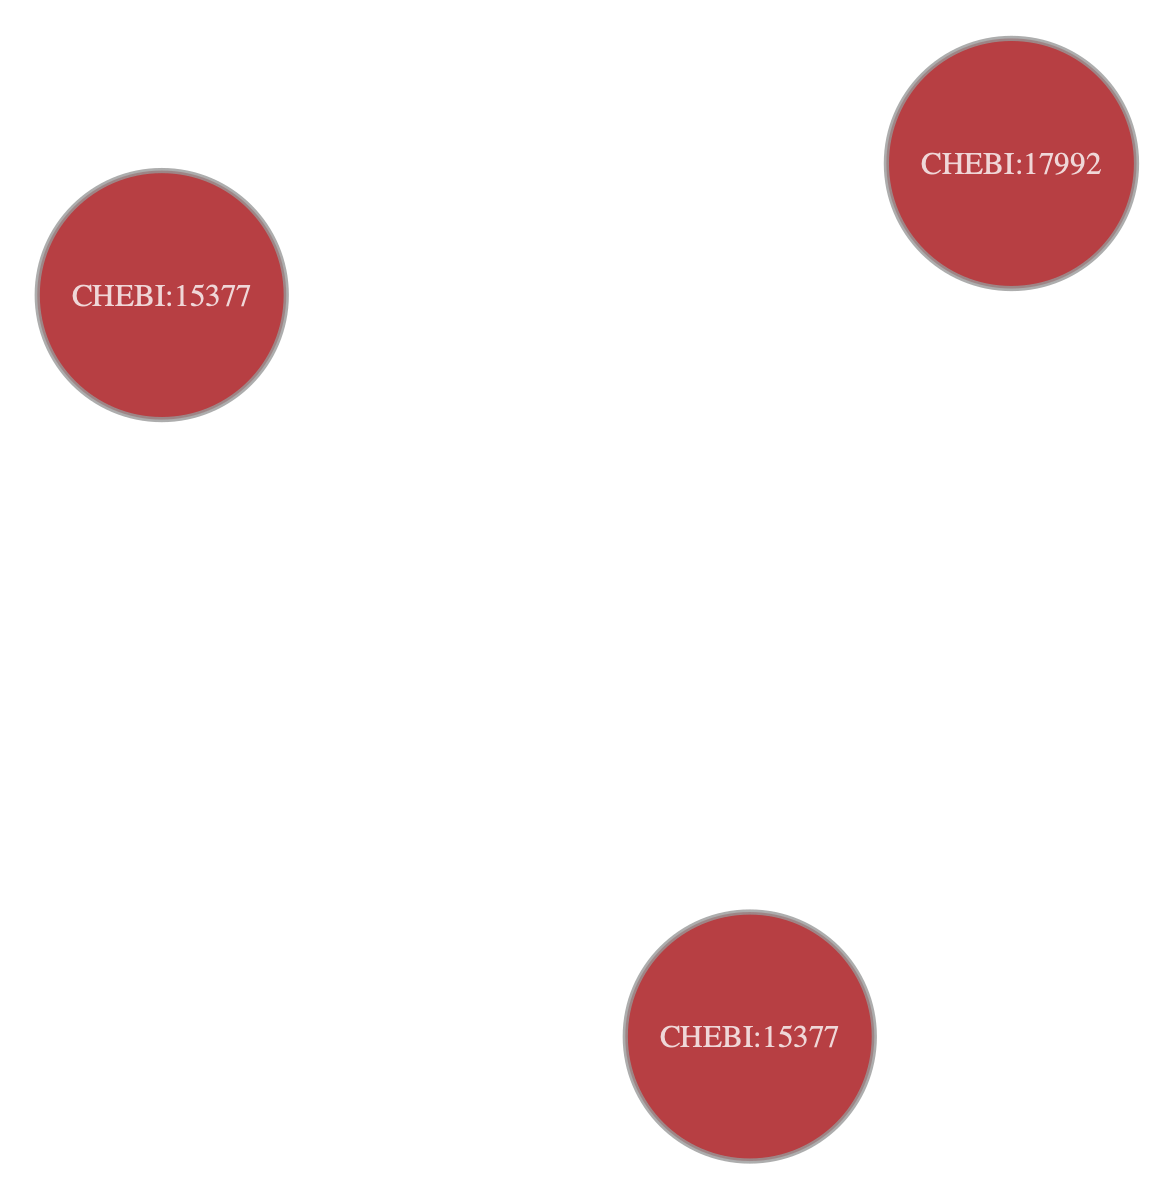

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14ba4c650, at 0x11ff23c20>

In [16]:
graph_draw(layer1_view, vertex_text=layer1_view.properties[('v','node_id')], vertex_size=26)

Note we could also add edges directly via our node map...

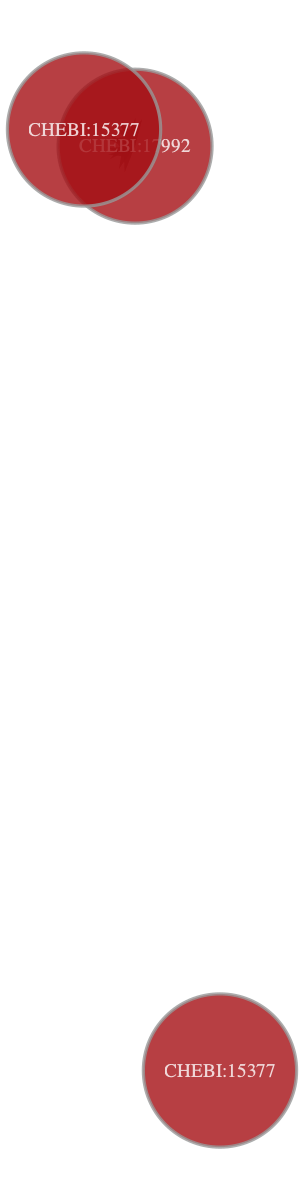

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14ba591c0, at 0x138cfe780>

In [22]:
network.add_edge_via_nodemap([(('layer1', 'CHEBI:15377'), ('layer1', 'CHEBI:17992'))])
# View a specific layer (e.g., layer1)
layer1_view_new = network.view_layer('layer1')
graph_draw(layer1_view_new, vertex_text=layer1_view_new.properties[('v','node_id')], vertex_size=16)